##                                              EdgeFlex AI: Smart Household Energy Optimization

### Problem Statement: 

Modern households face a significant challenge in managing their energy consumption efficiently. High dependency on the grid leads to increased electricity costs and a larger carbon footprint, especially during peak demand hours. While the adoption of renewable energy sources like rooftop solar offers a path to sustainability, a critical mismatch often exists between the time of peak energy generation (middle of the day) and peak energy consumption (morning and evening). This inefficiency means valuable, clean energy is often sold back to the grid for a low price, only for the household to buy expensive grid power later.

### Importing Required Libraries

In [ ]:
# Core libraries for data handling and numerical operations
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Overview

### Dataset Details - 1
* **Dataset Name**: **REFIT Electrical Load Measurements (Cleaned)**
* **Source**: [University of Strathclyde](https://pureportal.strath.ac.uk/files/62090184/CLEAN_REFIT_081116.7z)
* **File Format**: .csv

#### Dataset Description
The REFIT dataset contains high-frequency electrical consumption data from 20 UK households, collected over two years. For our project, we will focus on a single household. The data provides power readings (in Watts) for the entire household (aggregate) and for several individual appliances, recorded at an 8-second interval. This dataset is ideal for building high-resolution load forecasting models and analyzing appliance-level energy behavior.

#### Feature Description
* **Unix**: The UTC Unix timestamp for the measurement.
* **Aggregate**: Total power consumption of the household in Watts.
* **Appliance1...Appliance9**: Power consumption for an individual monitored appliance in Watts.
* **Issues**: A binary flag (0 or 1) indicating potential data quality issues.

### Dataset Details - 2
* **Dataset Name**: **Solar Power Generation Data**
* **Source**: [Kaggle](https://www.kaggle.com/datasets/pythonafroz/solar-powe-generation-data)
* **File Format**: .csv

#### Dataset Description
The Solar Power Generation dataset provides hourly records from a solar power plant, combining energy production metrics with corresponding weather data. It captures the key environmental factors that influence photovoltaic (PV) system output, such as solar radiation and temperature. This dataset is perfectly suited for training a model to forecast solar energy generation based on weather conditions.

#### Feature Description
* **Date-Hour(NMT)**: Timestamp of the measurement (hourly).
* **SystemProduction**: The total AC power generated by the PV system in kW (our target variable for solar forecasting).
* **Radiation**: The intensity of solar radiation.
* **AirTemperature**: The ambient air temperature in degrees Celsius.
* **RelativeAirHumidity**: The relative humidity of the air.
* **WindSpeed**: The speed of the wind.
* **Sunshine**: The duration of sunshine.
* **AirPressure**: The atmospheric pressure.

#### Loading the Dataset

In [ ]:
import pandas as pd

# Define the paths to your files
energy_data_path = r"C:\Users\Meges\Downloads\EdgeFlexAI\Datasets\CLEAN_House1.csv"
solar_data_path = r"C:\Users\Meges\Downloads\EdgeFlexAI\Datasets\Solar Power Plant Data.csv"

# Immediately load the data into the DataFrames
df_energy = pd.read_csv(energy_data_path)
df_solar = pd.read_csv(solar_data_path)

print("✅ Datasets loaded successfully!")

✅ Datasets loaded successfully!


#### Explore and Understand the Data

Dataset 1 - **Household Energy Data**

In [ ]:
import pandas as pd
# First 5 rows to see the data structure
print("Energy Data Head:")
df_energy.head()

Energy Data Head:


,Time,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,Issues
0,2013-10-09 13:06:17,1381323977,523,74,0,69,0,0,0,0,0,1,0
1,2013-10-09 13:06:31,1381323991,526,75,0,69,0,0,0,0,0,1,0
2,2013-10-09 13:06:46,1381324006,540,74,0,68,0,0,0,0,0,1,0
3,2013-10-09 13:07:01,1381324021,532,74,0,68,0,0,0,0,0,1,0
4,2013-10-09 13:07:15,1381324035,540,74,0,69,0,0,0,0,0,1,0


In [ ]:
# Dimensions of the energy dataset
print(f"The energy dataset has {df_energy.shape[0]} rows and {df_energy.shape[1]} columns.")

The energy dataset has 6960008 rows and 13 columns.


In [ ]:
# Descriptive statistics for the energy data
print("Descriptive Statistics for Energy Data:")
df_energy.describe()

Descriptive Statistics for Energy Data:


,Unix,Aggregate,Appliance1,Appliance2,Appliance3,Appliance4,Appliance5,Appliance6,Appliance7,Appliance8,Appliance9,Issues
count,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06
mean,1.409144e+09,4.811385e+02,1.753831e+01,1.655047e+01,2.900873e+01,1.844441e+00,1.102860e+01,1.116492e+01,2.473279e+00,5.803410e+00,6.947503e+01,8.359617e-03
std,1.579852e+07,8.128927e+02,4.309098e+01,2.883743e+01,3.800527e+01,5.611159e+01,1.439160e+02,1.567903e+02,1.192701e+01,1.317050e+01,2.557986e+02,9.104798e-02
min,1.381324e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.396639e+09,1.850000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,1.409931e+09,2.420000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,1.422401e+09,4.270000e+02,0.000000e+00,4.500000e+01,7.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.436529e+09,2.915900e+04,3.584000e+03,3.452000e+03,3.657000e+03,3.584000e+03,3.072000e+03,2.525000e+03,2.094000e+03,3.584000e+03,2.119000e+03,1.000000e+00


In [ ]:
# Count missing values in each column of the energy data
print("Missing Values in Energy Data:")
df_energy.isnull().sum()

Missing Values in Energy Data:


Time          0
Unix          0
Aggregate     0
Appliance1    0
Appliance2    0
Appliance3    0
Appliance4    0
Appliance5    0
Appliance6    0
Appliance7    0
Appliance8    0
Appliance9    0
Issues        0
dtype: int64

Dataset 2 - **Solar Power Data**

In [ ]:
# Display the first 5 rows to see the data structure
print("Solar Data Head:")
df_solar.head()

Solar Data Head:


,Date-Hour(NMT),WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
0,01.01.2017-00:00,0.6,0,1003.8,-7.4,0.1,97,0.0
1,01.01.2017-01:00,1.7,0,1003.5,-7.4,-0.2,98,0.0
2,01.01.2017-02:00,0.6,0,1003.4,-6.7,-1.2,99,0.0
3,01.01.2017-03:00,2.4,0,1003.3,-7.2,-1.3,99,0.0
4,01.01.2017-04:00,4.0,0,1003.1,-6.3,3.6,67,0.0


In [ ]:
# Get the dimensions of the solar dataset
print(f"The solar dataset has {df_solar.shape[0]} rows and {df_solar.shape[1]} columns.")

The solar dataset has 8760 rows and 8 columns.


In [ ]:
# Get a summary of the solar DataFrame (Data Types and Non-Nulls)
print("Solar Data Info:")
df_solar.info()

Solar Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date-Hour(NMT)       8760 non-null   object 
 1   WindSpeed            8760 non-null   float64
 2   Sunshine             8760 non-null   int64  
 3   AirPressure          8760 non-null   float64
 4   Radiation            8760 non-null   float64
 5   AirTemperature       8760 non-null   float64
 6   RelativeAirHumidity  8760 non-null   int64  
 7   SystemProduction     8760 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 547.6+ KB


In [ ]:
# Generate descriptive statistics for the solar data
print("Descriptive Statistics for Solar Data:")
df_solar.describe()

Descriptive Statistics for Solar Data:


,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2.639823,11.180479,1010.361781,97.538493,6.978893,76.719406,684.746071
std,1.628754,21.171295,12.793971,182.336029,7.604266,19.278996,1487.454665
min,0.000000,0.000000,965.900000,-9.300000,-12.400000,13.000000,0.000000
25%,1.400000,0.000000,1002.800000,-6.200000,0.500000,64.000000,0.000000
50%,2.300000,0.000000,1011.000000,-1.400000,6.400000,82.000000,0.000000
75%,3.600000,7.000000,1018.200000,115.600000,13.400000,93.000000,464.249950
max,10.900000,60.000000,1047.300000,899.700000,27.100000,100.000000,7701.000000


In [ ]:
# Count missing values in each column of the solar data
print("Missing Values in Solar Data:")
df_solar.isnull().sum()

Missing Values in Solar Data:


Date-Hour(NMT)         0
WindSpeed              0
Sunshine               0
AirPressure            0
Radiation              0
AirTemperature         0
RelativeAirHumidity    0
SystemProduction       0
dtype: int64

### Data Preprocessing and Feature Engineering

**Process the Household Energy Data**

In [ ]:
energy_data_path = r'C:\Users\Meges\Downloads\EdgeFlexAI\Datasets\CLEAN_House1.csv'
df_energy = pd.read_csv(energy_data_path)

appliance_names = {
    'Appliance1': 'Fridge', 'Appliance2': 'Freezer_1', 'Appliance3': 'Freezer_2',
    'Appliance4': 'Washer_Dryer', 'Appliance5': 'Washing_Machine', 'Appliance6': 'Dishwasher',
    'Appliance7': 'Computer_Site', 'Appliance8': 'Television_Site', 'Appliance9': 'Electric_Heater'
}
df_energy.rename(columns=appliance_names, inplace=True)

df_energy['timestamp'] = pd.to_datetime(df_energy['Unix'], unit='s')
df_energy.set_index('timestamp', inplace=True)
df_energy.drop(['Time', 'Unix'], axis=1, inplace=True)

print(df_energy.head())


                     Aggregate  Fridge  Freezer_1  Freezer_2  Washer_Dryer  \
timestamp                                                                    
2013-10-09 13:06:17        523      74          0         69             0   
2013-10-09 13:06:31        526      75          0         69             0   
2013-10-09 13:06:46        540      74          0         68             0   
2013-10-09 13:07:01        532      74          0         68             0   
2013-10-09 13:07:15        540      74          0         69             0   

                     Washing_Machine  Dishwasher  Computer_Site  \
timestamp                                                         
2013-10-09 13:06:17                0           0              0   
2013-10-09 13:06:31                0           0              0   
2013-10-09 13:06:46                0           0              0   
2013-10-09 13:07:01                0           0              0   
2013-10-09 13:07:15                0           0   

**Process the Solar and Weather Data**

In [ ]:
import pandas as pd

# Use the absolute path you confirmed works
solar_data_path = r"C:\Users\Meges\Downloads\EdgeFlexAI\Datasets\Solar Power Plant Data.csv"

# 1. Load the original data fresh every time the cell is run
df_solar = pd.read_csv(solar_data_path)

# 2. Perform all processing steps
solar_column_names = {
    'Date-Hour(NMT)': 'timestamp',
    'SystemProduction': 'solar_generation_kw',
    'WindSpeed': 'wind_speed',
    'Sunshine': 'sunshine_hours',
    'AirPressure': 'air_pressure',
    'Radiation': 'radiation',
    'AirTemperature': 'air_temperature',
    'RelativeAirHumidity': 'relative_humidity'
}
df_solar.rename(columns=solar_column_names, inplace=True)

df_solar['timestamp'] = pd.to_datetime(df_solar['timestamp'], format='%d.%m.%Y-%H:%M')
df_solar.set_index('timestamp', inplace=True)

print("✅ Solar data loaded and processed successfully.")
print(df_solar.head())

✅ Solar data loaded and processed successfully.
                     wind_speed  sunshine_hours  air_pressure  radiation  \
timestamp                                                                  
2017-01-01 00:00:00         0.6               0        1003.8       -7.4   
2017-01-01 01:00:00         1.7               0        1003.5       -7.4   
2017-01-01 02:00:00         0.6               0        1003.4       -6.7   
2017-01-01 03:00:00         2.4               0        1003.3       -7.2   
2017-01-01 04:00:00         4.0               0        1003.1       -6.3   

                     air_temperature  relative_humidity  solar_generation_kw  
timestamp                                                                     
2017-01-01 00:00:00              0.1                 97                  0.0  
2017-01-01 01:00:00             -0.2                 98                  0.0  
2017-01-01 02:00:00             -1.2                 99                  0.0  
2017-01-01 03:00:00     

### Resampling and Aligning Data

In [ ]:
# Resample the energy data to an hourly frequency ('h') using the updated syntax.
df_energy_hourly = df_energy.resample('h').mean()

# Fill any missing values using the updated .ffill() method.
df_energy_hourly.ffill(inplace=True)

print(df_energy_hourly.head())

                      Aggregate     Fridge  Freezer_1  Freezer_2  \
timestamp                                                          
2013-10-09 13:00:00  969.784091  17.045455  18.787879   2.225379   
2013-10-09 14:00:00  651.300347   2.845486  18.203125  41.786458   
2013-10-09 15:00:00  599.468421  36.468421  17.307018  37.085965   
2013-10-09 16:00:00  290.964851   0.710018  17.098418   9.739895   
2013-10-09 17:00:00  305.509719  37.928726  21.002160  35.982721   

                     Washer_Dryer  Washing_Machine  Dishwasher  Computer_Site  \
timestamp                                                                       
2013-10-09 13:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 14:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 15:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 16:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 17:00:00      0.017279    

### Merging Datasets

In [ ]:
# Merge the two hourly dataframes on their common timestamp index.
df_final = pd.merge(
    df_energy_hourly,
    df_solar,
    left_index=True,
    right_index=True,
    how='inner'
)

df_final.info()
print("\n")
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Aggregate            0 non-null      float64
 1   Fridge               0 non-null      float64
 2   Freezer_1            0 non-null      float64
 3   Freezer_2            0 non-null      float64
 4   Washer_Dryer         0 non-null      float64
 5   Washing_Machine      0 non-null      float64
 6   Dishwasher           0 non-null      float64
 7   Computer_Site        0 non-null      float64
 8   Television_Site      0 non-null      float64
 9   Electric_Heater      0 non-null      float64
 10  Issues               0 non-null      float64
 11  wind_speed           0 non-null      float64
 12  sunshine_hours       0 non-null      int64  
 13  air_pressure         0 non-null      float64
 14  radiation            0 non-null      float64
 15  air_temperature      0 non-null      float64
 16 

### Feature Engineering

In [ ]:
# Create time-series features from the DatetimeIndex
df_energy_hourly['hour'] = df_energy_hourly.index.hour
df_energy_hourly['day_of_week'] = df_energy_hourly.index.dayofweek # Monday=0, Sunday=6
df_energy_hourly['month'] = df_energy_hourly.index.month
df_energy_hourly['day_of_year'] = df_energy_hourly.index.dayofyear
df_energy_hourly['week_of_year'] = df_energy_hourly.index.isocalendar().week.astype(int)

# Display the DataFrame to see the new feature columns
print(df_energy_hourly.head())

                      Aggregate     Fridge  Freezer_1  Freezer_2  \
timestamp                                                          
2013-10-09 13:00:00  969.784091  17.045455  18.787879   2.225379   
2013-10-09 14:00:00  651.300347   2.845486  18.203125  41.786458   
2013-10-09 15:00:00  599.468421  36.468421  17.307018  37.085965   
2013-10-09 16:00:00  290.964851   0.710018  17.098418   9.739895   
2013-10-09 17:00:00  305.509719  37.928726  21.002160  35.982721   

                     Washer_Dryer  Washing_Machine  Dishwasher  Computer_Site  \
timestamp                                                                       
2013-10-09 13:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 14:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 15:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 16:00:00      0.000000              0.0         0.0            0.0   
2013-10-09 17:00:00      0.017279    

### Splitting the Data for Time-Series

**Define Features and Target, then Split**

In [ ]:
# Define the target variable
TARGET = 'Aggregate'

# Define the features (all columns except the target)
features = [col for col in df_energy_hourly.columns if col != TARGET]

X = df_energy_hourly[features]
y = df_energy_hourly[TARGET]

# Calculate the split points
train_size = int(len(df_energy_hourly) * 0.70)
val_size = int(len(df_energy_hourly) * 0.85)

# Split the data chronologically
X_train, y_train = X.iloc[:train_size], y.iloc[:train_size]
X_val, y_val = X.iloc[train_size:val_size], y.iloc[val_size:]
X_test, y_test = X.iloc[val_size:], y.iloc[val_size:]

print(f"Training set shape:   {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape:       {X_test.shape}")

Training set shape:   (10734, 15)
Validation set shape: (2300, 15)
Test set shape:       (2301, 15)


**Visualize the Splits**

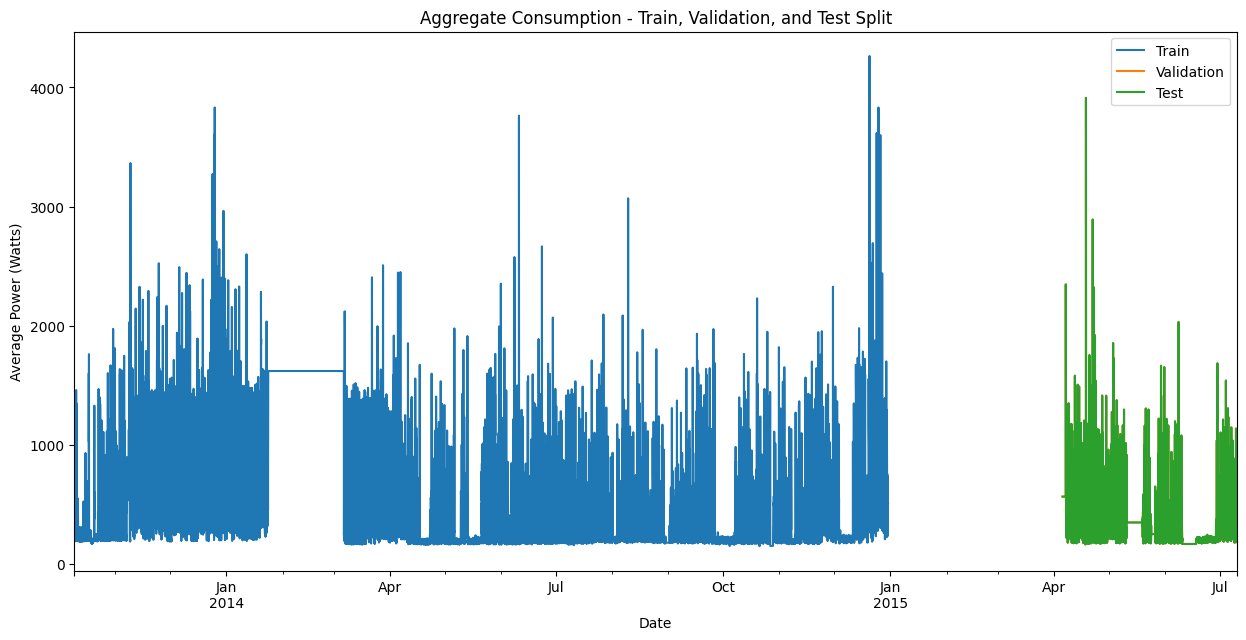

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.title('Aggregate Consumption - Train, Validation, and Test Split')
y_train.plot(label='Train')
y_val.plot(label='Validation')
y_test.plot(label='Test')
plt.xlabel('Date')
plt.ylabel('Average Power (Watts)')
plt.legend()
plt.show()